# Bohr models of ions

The Bohr model works for atoms with only one electron. Adding electrons would require accounting for their mutual Coulomb forces, which would depend on the electrons' locations in their orbits. However, there are ions that have only one electron, for which a small modification to the Bohr model can predict their energy levels.

Read the notebook <tt>Bohr_model_extensions.ipynb</tt>, which is on the class GitHub page. You will be using Equation 1 to compare the photon energy that correspond to energy level transitions in hydrogen, singly-ionized helium, and doubly-ionized lithium.

Note: you are responsible for importing the packages you need and making sure your axis labels are large enough to be readable.

<ol>
    <li>Write a function that finds the photon <em>energy</em> in eV (calculate it from the wavelength predicted by the Rydberg equation) that moves an electron between levels $n$ and $n+1$. The independent variables of your function should be $Z$ (atomic number) and $n$. Do not hand-code any constants: use the pre-programmed values in <tt>scipy</tt>.</li>
</ol>

In [10]:
# Your code here
import numpy as np
import scipy.constants as const

def photon_energy(Z, n):
    # Rydberg constant in SI units
    R_inf_SI = const.Rydberg*(Z**2)
    # Convert Rydberg constant to eV
    R_inf_eV = R_inf_SI/const.electron_volt
    # Calculate the wavelength using Rydberg equation
    lambda_nm = (1/(R_inf_eV*(1/n**2 - 1/(n+1)**2)))*(1e9)
    # Calculate photon energy using E=hc/lambda
    energy_J = (const.h*const.c)/lambda_nm
    # Convert energy from joules to eV
    energy_eV = energy_J/const.electron_volt

    return energy_eV


<ol start = 2>
    <li>Use the python function of your choice to create an integer <em>array</em> (not list) of values $n = 1, 2, \ldots, 10$. Do not simply hard-code in all the numbers by hand. Create a second array (not list) of atomic numbers $Z = 1, 2, 3$, again using a python function.</li>
</ol>

In [ ]:
# Your code here
n_array = np.arange(1, 11)
Z_array = np.arange(1, 4)

<ol start=3>
    <li>For each combination of $Z$ and $n$, calculate the energy of light required to move from level $n$ to $n+1$. Store the results in an array with 3 rows and 10 columns. You may find the meshgrid command helpful.</li>
</ol>

In [8]:
# Define the function to calculate photon energy
def photon_energy(Z, n):
    # Rydberg constant in SI units
    R_inf_SI = const.Rydberg*(Z**2)
    # Convert Rydberg constant to eV
    R_inf_eV = R_inf_SI/const.electron_volt
    # Calculate the wavelength using Rydberg equation
    lambda_nm = (1/(R_inf_eV*(1/n**2 - 1/(n+1)**2)))*(1e9)
    # Calculate photon energy using E=hc/lambda
    energy_J = (const.h*const.c)/lambda_nm
    # Convert energy from joules to eV
    energy_eV = energy_J/const.electron_volt

    return energy_eV

# Create arrays for values of Z and n
Z_values = np.arange(1, 4)
n_values = np.arange(1, 11)
# Create a meshgrid of Z and n values
Zv, nv = np.meshgrid(Z_values, n_values)
# Calculate photon energies for all combinations of Z and n
energies = photon_energy(Zv, nv)
# Reshape the energies array to have 3 rows and 10 columns
energies_reshaped = energies.reshape(3, 10)

print("Photon energies array:")
print(energies_reshaped)


Photon energies array:
[[6.36900428e+10 2.54760171e+11 5.73210385e+11 1.17944524e+10
  4.71778095e+10 1.06150071e+11 4.12805833e+09 1.65122333e+10
  3.71525250e+10 1.91070128e+09]
 [7.64280514e+09 1.71963116e+10 1.03791181e+09 4.15164724e+09
  9.34120628e+09 6.25828085e+08 2.50331234e+09 5.63245277e+09
  4.06186498e+08 1.62474599e+09]
 [3.65567848e+09 2.78480125e+08 1.11392050e+09 2.50632113e+09
  1.99195196e+08 7.96780783e+08 1.79275676e+09 1.47381917e+08
  5.89527669e+08 1.32643726e+09]]


<ol start=4>
    <li>Now you are going to make a color-coded plot. With $n$ on the x-axis and $z$ on the y-axis, add a circle to your plot at each $(n,z)$ ordered pair with the color determined by the energy calculated in question 3. Make sure your plot has a colorbar to show the energy scale, and put units on the colorbar. x and y axes should also be labeled.</li>
</ol>

I am including an example plot showing arbitrary dependent variable $w$ on a color scale as a function of independent variables $u$ and $v$. None of these variables mean anything; this example is just to help you visualize what your plot should look like.

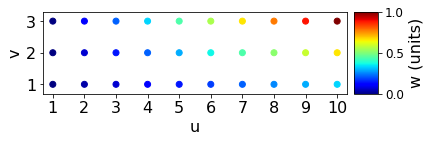

In [1]:
from PIL import Image
sample = Image.open("color_coded_scatter_example.png")
display(sample)

Code that might help you make your plot is in the cell below. You are free to do something else if you prefer.

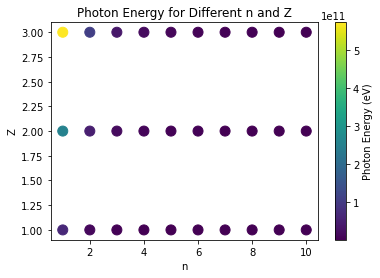

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def photon_energy(Z, n):
    # Rydberg constant in SI units
    R_inf_SI = const.Rydberg*(Z**2)
    # Convert Rydberg constant to eV
    R_inf_eV = R_inf_SI/const.electron_volt
    # Calculate the wavelength using Rydberg equation
    lambda_nm = (1/(R_inf_eV*(1/n**2 - 1/(n+1)**2)))*(1e9)
    # Calculate photon energy using E=hc/lambda
    energy_J = (const.h*const.c)/lambda_nm
    # Convert energy from joules to eV
    energy_eV = energy_J/const.electron_volt

    return energy_eV

# Create arrays for values of Z and n
Z_values = np.arange(1, 4)
n_values = np.arange(1, 11)
# Create a meshgrid of Z and n values
Zv, nv = np.meshgrid(Z_values, n_values)
# Calculate photon energies for all combinations of Z and n
energies = photon_energy(Zv, nv)
# Creating plot
fig, ax = plt.subplots()
sc = ax.scatter(nv, Zv, c=energies, cmap='viridis', s=100)
# Adding the colorbar
cbar = fig.colorbar(ScalarMappable(norm=Normalize(vmin=np.min(energies), vmax=np.max(energies)), cmap='viridis'), ax=ax)
cbar.set_label('Photon Energy (eV)')
# Add labels and title
ax.set_xlabel('n')
ax.set_ylabel('Z')
ax.set_title('Photon Energy for Different n and Z')
plt.show()
